In [1]:
from common import utils
import random
u=utils(False)

Ce cours a été régénéré le 2018-08-20 22:57:18.090590


# Les scripts

## Le shell

L'interface avec les systèmes d'exploitation a une [longue histoire](http://cristal.inria.fr/~weis/info/commandline.html). Il y a toujours eu une façon d'interagir avec les ordinateurs qui a évolué avec le temps. On peut citer plusieurs grands mouvements, mais globalement :

  * jusqu'à la fin des années 1960, les systèmes de *batch*
  * De 1968 à 1984, c'est l'essor des interfaces avec ligne de commande
  * À partir du milieu des années 80, les interfaces graphiques sortent des laboratoires pour arriver chez les particuliers : interface Mac par Apple en 1984 et Windows 1.0 en 1985.
  * Depuis les années 2010, développement d'interfaces encore en progression: interfaces tactiles, commande vocale, réalité augmentée…

Le shell est un nom générique pour certains types d'interface en ligne de commande. Ils permettent de faire des *scripts*, reproduisant ainsi les fonctionnalités des anciens systèmes de batch, mais aussi un travail interactif. À l'aide d'un langage spécifique, il est possible de contrôler une application dont l'utilité principale est de lancer d'autres applications. Le langage est suffisamment évolué pour permettre de faire des programmes rudimentaires.

Il existe un (et même plusieurs) shell(s) pour les principaux systèmes d'exploitation pour ordinateurs personnels (Windows, Mac, Linux).

Le shell selon les systèmes d'exploitation :

  * Windows (basé sur MSDOS): `command.com`
  * Windows (basé sur NT): `cmd.exe`
  * Windows Vista/XP : Powershell
  * Linux/Mac OS X : `bash` mais aussi `dash`, `posh`, `tcsh` (et aussi ceux du dessous).
  * Anciens UNIX : `sh`, `csh`, `ksh` et très souvent ceux du dessus.
  * Mac OS (≤9) : `Hypercard` pourrait être considéré comme un shell. 

L'idée est que le shell est une coquille autour de l'ordinateur, vu comme le matériel plus le noyau plus les utilitaires de base. L'analogie reste pour les interfaces graphiques, parfois qualifiées en anglais de *graphic shell*.

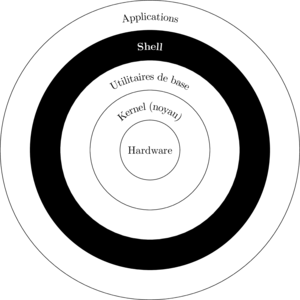

In [2]:
%%tikz -l decorations.text,calc,arrows.meta -s 300,300
\coordinate (O) at (0,0);
\draw (O) circle (5);
\draw[fill=black] (O) circle (4);
\draw[fill=white] (O) circle (3);
\draw (O) circle (2);
\draw (O) circle (1);

\node (O) {Hardware};
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Kernel (noyau)}},decorate] (1.5,0) arc (0:180:1.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Utilitaires de base}},decorate] (2.5,0) arc (0:180:2.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={|\bfseries\color{white}|Shell}},decorate] (3.5,0) arc (0:180:3.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Applications}},decorate] (4.5,0) arc (0:180:4.5);


## Le fonctionnement du shell

Nous allons étudier en particulier le fonctionnement du shell `bash` qui est utilisé comme shell par défaut sous Linux, Mac OS et même d'autres systèmes dérivés d'Unix.

Le shell a deux modes de fonctionnement : 
  * *interactif* où il fonctionne selon le principe d'une boucle REPL (read-eval-print loop)
  * *script* où il lit un fichier d'instructions, et exécute au fur et à mesure les instructions qui lui sont données.

Il n'y a pas, à votre niveau, de différences significative entre les deux modes : à part l'affichage d'un *prompt* lorsque le shell attend des instructions en mode interactif, le langage est le même. Si vous tapez des instructions une à une dans 

> Note : les boucles REPL sont assez fréquentes dans les outils informatiques. C'est le mode de fonctionnement typique des langages interprétés, au nombre desquels on peut compter le shell, Python, PHP, Perl, Prolog, R, Gnuplot, Postscript, etc. D'autres langages peuvent être adaptés à fonctionner en REPL mais ce n'est pas leur fonctionnement par défaut, et souvent accompagné de diminution de leurs possibilités.

Il est possible dans les notebooks Jupyter que vous lisez de faire des scripts shell, mais un certain nombre de choses vont être limitées :

  * Impossibilité de lire le clavier
  * l'affichage se fait dans un terminal pauvre, avec peu de capacités (pas de gras, pas de couleur).
  
Pour ces raisons, il vous est recommandé d'essayer de taper les commandes dans un terminal lorsque vous travaillez en mode interactif. Le terminal est une application qui sert essentiellement à afficher du texte, à lire le clavier et à envoyer ce qui est tapé à une autre application qui tourne _à l'intérieur du terminal_, typiquement, le shell.

Des fois, l'analyse d'une ligne ne suffit pas à savoir comment exécuter : dans ce cas, l'analyse reste "en suspens", et sans rien exécuter, le shell va chercher à avoir une "phrase" correcte avant de faire quelque chose.

C'est l'exemple de la boucle dans ce qui va suivre.

In [ ]:
%%tikz -l automata,positioning,decorations.pathreplacing,patterns -s 800,400
\node[node distance=2.5cm,state] (0) {Attente};
\node[node distance=2.5cm,state] (1) [right=of 0] {Analyse};
\node[node distance=2.5cm,state] (2) [right=of 1] {Affichage};

\node[node distance=2.5cm,state] (3) [right=of 2] {Fichier texte};
\node[node distance=2.5cm,state] (4) [right=of 3] {Lecture};
\node[node distance=2.5cm,state] (5) [right=of 4] {Analyse};
\node[node distance=2.5cm,state] (6) [right=of 5] {Affichage};

\path[->,shorten >=1pt]
    (0) edge                node[below] {saisie}    node[above] {read} (1)
    (1) edge                node[below] {exécution} node[above] {eval} (2)
    (2) edge [bend right]   node[below] {boucle}    node[above] {loop} (0)

    (3) edge                node[below] {interprétation} node[above] {run} (4)
    (4) edge                node[below] {lecture}        node[above] {read} (5)
    (5) edge                node[below] {exécution}      node[above] {eval} (6)
    (6) edge [bend right]   node[below] {boucle}         node[above] {loop} (4)
    ;
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (0.west) -- (2.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {interactif};
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (4.west) -- (6.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {script};




### Détails techniques
#### Un script shell
Ouvrir un éditeur de texte, saisir un programme.

La première ligne d'un script shell doit être `#! /bin/sh`. Cette ligne « magique » permet au système de savoir quel interpréteur utiliser.

Ensuite pour exécuter le script, deux possibilités :

  * Dans un terminal, taper `sh nomduscript`
  * Dans un terminal, une fois pour toute : autoriser à exécuter le script `chmod +x nomduscript` puis à chaque fois qu'on veut l'interpréter : `./nomduscript`.

Cette partie un peu « magique » a des explications (et vous verrez du coup d'autres façons de faire avant la fin de ce module, mais les expliquer en détail serait trop compliqué à ce stade.

Traditionnellement, on rajoute une extension `.sh` aux scripts shells, mais ce n'est pas une nécessité, et dans certains contextes, pas une bonne idée.

Vous n'êtes pas obligé de fermer l'éditeur de texte pour interpréter (on dit aussi exécuter, lancer), mais par contre, il faut bien sauvegarder le script avant de le lancer.

#### Le fonctionnement du terminal

Anciennement, un terminal était un périphérique spécifique (il en existait des tas). Ce n'était pas forcément un ordinateur complet, même si certains étaient capable d'avoir un système d'exploitation fonctionnel (par exemple, le minitel).

![Terminal VT 220 by Adamantios on wikimedia](./DEC-VT220-0a.jpg "VT220 by Adamantios on wikimedia")

Le terminal de nos jours est une application dont les fonctions sont :

 1. Afficher du texte fourni par une autre *application interne*
 2. Lire le clavier et afficher les touches tapées
 3. Gérer certaines touches spéciales (retour arrière)
 4. Lorsqu'un retour à la ligne est tapé, rendre disponible le texte tapé pour l'application interne.
 
Par défaut, le terminal a comme *application interne* un shell, ce qui fait qu'on peut y taper des commandes du shell et obtenir un retour.


In [ ]:
%%tikz -l shapes,arrows,fit -x \pgfdeclarelayer{background}\pgfsetlayers{background,main}
\tikzstyle{block} = [draw, rectangle, minimum height=1.6em, minimum width=2em, node distance=3cm]
\tikzstyle{arrow} = [shorten >=1pt,->, thick]
\tikzstyle{dblarrow} = [thick,<->]
\node[block] (keyboard) {Clavier};
\node[block,right of=keyboard] (driverKeyboard) {Pilote Clavier};
\node[block,right of=driverKeyboard] (terminal) {Terminal};
\node[block,right of=terminal] (shell) {Shell};
\node[block,below of=terminal] (window) {Window system};
\node[block,left of=window] (driverScreen) {Pilote écran};
\node[block,left of=driverScreen] (screen) {Écran};

\draw [arrow] (keyboard) -- (driverKeyboard);
\draw [arrow] (driverKeyboard) -- (terminal);
\draw [arrow] (terminal) -- (window);
\draw [arrow] (window) -- (driverScreen);
\draw [arrow] (driverScreen) -- (screen);
\draw [dblarrow] (terminal) -- (shell);
\begin{pgfonlayer}{background}
\node[fill=black!30,fit=(driverKeyboard)(driverScreen), block] {Noyau};
\end{pgfonlayer}
\begin{pgfonlayer}{background}
\node[fill=black!20,fit=(keyboard)(screen), block] {Matériel};
\end{pgfonlayer}
\begin{pgfonlayer}{background}
\node[fill=black!10,fit=(terminal)(window)(shell), block] {Applications};
\end{pgfonlayer}

In [ ]:
%%sh
# La première ligne sert à indiquer que le programme n'est pas en python, mais dans un autre langage
# Ici, en shell
# Un petit script, qui montre deux commandes différentes, une boucle, une variable. 
echo "Hello, world!"
echo "-----"
head -n 5 inventaire.txt # affiche les cinq premières lignes de inventaire.txt
echo "-----"
for i in 1 2 3
do
    echo "$i"
done
echo "J'irai dans les bois."

### Syntaxe de base du shell

Une ligne de commande se présente sous la forme de mots séparés par des espaces :

    commande mot1 mot2 mot3

Un mot mis entre guillemets `"comme ça"` est un seul mot, même s'il y a un ou plusieurs espaces au milieu. Pareil pour un mot `'entre apostrophes'`. Mais sinon, les espaces séparent les mots.

Les mots vont servir d'argument à la commande et  sont de divers types :

  * des chaînes de caractères
  * des noms de fichiers
  * des expressions plus complexes
  * des options (qui viennent modifier le sens de la commande) en général introduit par un tiret (ou deux).

Pour pouvoir faire des scripts shells, il va falloir apprendre un certain nombre de commandes basiques. Comme des briques élémentaires, ces commandes pourront ensuite être enchainées pour former de véritables programmes. Pour ce cours, une cinquantaine de commandes devront être connues.

Lorsqu'il y a des options, elles sont généralement mises juste derrière le nom de la commande. Les options peuvent avoir besoin de valeurs pour fonctionner, elles "consomment" alors un argument qui du coup ne sera pas utilisé comme "argument principal".

À noter, plusieurs espaces entre les mots comptent comme un seul espace. Si vous voulez un mot *vide*, il faut le matérialiser comme ceci : `echo "Un" "" "vide"`

**Commentaires:** Il est bien sûr possible de faire des commentaires dans un script shell. Un `#` qui n'est pas protégé sera interprété comme le début d'un commentaire qui court jusqu'à la fin de la ligne.

**Caractères spéciaux et protection:** les caractères spéciaux peuvent tous être protégés contre leur interprétation spéciale, et simplement être eux-mêmes. Pour les protéger, il suffit de :

  * mettre un backslash `\` devant, ou
  * mettre l'expression entre apostrophes droites `'...'` (sauf pour l'apostrophe droite, du coup), ou
  * mettre l'expression entre guillemets droits `"..."` (sauf pour dollar, guillemet droit, backslash et backquote).

Comme il n'y a pas de notion de fin de chaîne lorsqu'on arrive sur une apostrophe fermante ou un guillemet fermant mais uniquement de mots, on peut utiliser plusieurs de ces trucs dans le même mot, comme par exemple `echo \#'"'"'"` qui affiche `#"'`

**Retour à la ligne:** Deux commandes sont séparées par un retour à la ligne, ou par un point-virgule (non protégé, donc). La suite d'instruction suivante :

    echo "Bonjour..."
    echo "...le monde !"

est identique à :

    echo "Bonjour..." ; echo "...le monde !"

Une différence : en mode interactif, après un retour à la ligne, la commande est traitée immédiatement, et suivie de l'affichage du prompt. Dans un script, cette différence disparaît complètement.

In [ ]:
%%sh
echo "Observer les différences entre les différents comportements"
echo "---- -n 12 (une option avec une valeur) ----"
head -n 12 inventaire.txt
echo "---- -n 2 -v (deux options dont une avec une valeur) ----"
head -n 2 -v inventaire.txt
echo "---- -n2 -v (deux options dont une avec une valeur collée) ----"
head -n2 -v inventaire.txt
echo "---- -n 5 -v (deux options et deux arguments) ----"
head -n 5 -v inventaire.txt common.py
echo "---- pas d'option  ----"
head inventaire.txt
echo "---- fini ----"

### Variables

Pour être suffisamment souple, le shell dispose d'un système de variable. Toutefois, ces variables ne sont que des chaînes de caractères.

Pour donner une valeur à une variable, il suffit d'écrire `NOM=valeur`
La valeur doit être un seul mot (s'il y a des espaces il faut les protéger en les mettant entre guillemets).

Attention : il ne doit par contre pas y avoir d'espaces autour du signe `=`.

Pour utiliser la valeur d'une variable, il suffit d'écrire `$NOM` dans la ligne de commande ou la ligne de script. Si le `$` n'a pas été protégé, `$NOM` sera remplacé par la valeur de la variable.

On peut aussi écrire `${VARIABLE}` si on veut être sûr de bien séparer le nom de la variable de ce qu'il y a autour.

In [ ]:
%%sh
# Exemple

A="Bonjour"
B="le monde!"
echo "$A $B"
C="$A, $B"
echo $C
C="$C — $C"
echo $C

echo "3 mots"
for i in $A $B
do
    echo $i
done
echo "2 mots"
for i in "$A" "$B"
do
    echo $i
done
echo "1 mot"
for i in "$A $B"
do
    echo $i
done

echo "----- accolades -----"
echo "X $AB X"
echo "X ${A}B X"


In [ ]:
%%sh
# activité
# Prévoir ce qui va être affiché par les lignes suivantes. Le justifier par le découpage syntaxique
# Lorsque deux espaces se suivent, n'hésitez pas à l'indiquer !
NOM="Han Honyme"
ID=2345
# Commenter la ligne suivante pour la solution
echo () { /bin/echo;/bin/echo "________________________________________________________________"; }
echo "Bonjour $NOM $ID"
echo "Bonjour \"Monsieur\" $NOM #$ID"
echo 'Bonjour $NOM #$ID'
echo Bonjour "$NOM" #$ID
echo Bonjour \$NOM \#\$ID
echo "Bonjour _$nom $ID_"
echo Bonjour "" "'"$NOM"'" \#$ID
echo Bonjour '\"$NOM\"' "" "" "$ID"

## Itérations

Nous les avons vues plus haut : il est possible de faire une boucle sur une liste de mots, pour éviter de répéter des opérations presques similaires. Cela aide à remplir la fonction du script qui est d'automatiser des tâches répétitives.

La syntaxe d'une boucle est simple : on crée une variable (nom au choix) à partir d'une liste de mots. Les instructions répétées sont encadrées par les mots clés `do` et `done`.

    for variable in mot1 mot2 mot3
    do
        commande1 $variable
        commande2
    done

On lui préférera souvent une forme un peu plus compacte:

    for variable in mot1 mot2 mot3; do
        commande1 $variable
    done

ou même

    for variable in mot1 mot2 mot3; do commande1 $variable; done

Contrairement à Python, l'indentation n'est pas obligatoire en shell, mais _elle n'en reste pas moins importante pour la compréhension_. Le pire est la fausse indentation (qui donne l'impression qu'on est dans la boucle alors qu'on n'y est plus, par exemple).

In [ ]:
%%sh

echo "Activité : comptine régulière"
echo "Ouvrez un terminal, et essayez de reproduire la comptine ci-dessous, sans la taper en entier"
echo "(oui, la comptine normale est plus longue ; 💡 économie de papier si vous imprimez !)"
for i in do ré mi fa sol la si do; do
    echo "J'ai perdu le \"$i\" de ma clarinette"
    echo "J'ai perdu le \"$i\" de ma clarinette"
    echo "Ah, si papa il savait ça, tralala"
    echo "Ah, si papa il savait ça, tralala"
done

## Lire une variable
C'est extrêmement simple. Pour lire une variable au clavier, il suffit d'utiliser la commande `read` suivie du nom de la variable à remplir.

    echo "Bonjour, donnez-moi une valeur :"
    read a
    print "Vous m'avez donné $a"

Toutefois, comme les notebooks Jupyter ont un terminal très pauvre, ils ne peuvent pas faire de lecture interactive au clavier, et `read` met juste une valeur vide dans les variables. Par la suite, pour les notebooks, il faut utiliser `a=XXX` pour remplacer (mais ça ne marche pas dans une boucle où on voudrait des valeurs différentes, par exemple).

## Calculs

Il est possible de faire des calculs simples portant sur des entiers en shell.
Ces calculs permettent de mieux automatiser les tâches.

La syntaxe est simple, sauf pour le cas où l'on veut utiliser une variable dans le calcul : on n'est pas obligé de mettre le signe `$` devant le nom de la variable pour qu'il soit remplacé.

Notez bien que tous ces calculs sont fait sur des entiers. Si une variable n'est pas une chaîne de caractère composée uniquement de nombres, alors la valeur est prise comme étant 0, sans aucune indication d'erreur.

In [ ]:
%%sh

A=2
B=3
E=19
echo "1+2+3 = $((1+2+3))"
echo "A+2+B = $((A+2+B))"
C=$((E/5)) # Division entière
D=$((E%5)) # Reste de la division
echo "$C*5+$D = $(( C*5+D ))"

In [ ]:
%%sh
echo "Activité : calculs basique"

echo "En 3 commandes, faites en sorte de mettre 3 dans une variable, d'y ajouter 13 et d'afficher le résultat."
echo ""

res=3
res=$((res+13))
echo "Résultat: $res"

In [ ]:
%%sh
echo "Activité : âge respectable d'union"
echo "Il est considéré respectable (dans certains milieux) que la personne avec qui vous soyez n'ait pas moins"
echo "que la moitié de votre âge plus 7 (et inversement, que vous n'ayez pas moins que la moitié de son âge plus 7)."
echo "Référence : https://www.xkcd.com/314/"

echo "Faites un script shell qui demande l'âge de quelqu'un, et affiche entre quels âges minimum et maximum peut"
echo "être le partenaire."
echo ""

echo "Bonjour, quelle est votre âge ?"
age=21;echo $age # read age dans un script

echo "L'age de la personne doit être entre $((age/2+7)) ans et $(( (age-7)*2 )) ans"

## Valeur de retour

Toutes les commandes ont une **valeur de retour** qui est forcément un nombre. La valeur de ce nombre est stocké après chaque commande dans la variable spéciale `$?`.

Il est possible d'interroger cette valeur de retour pour faire deux structures traditionnelles de la programmation : les boucles *while* et les tests *if ... then ... else ...*

Toutes les commandes donnent donc en général la valeur de retour 0 qui est considérée comme *vraie*. Toutes les autres valeurs sont considérées comme *fausses*. Elles sont données en cas de comportement anormal, par exemple si on essaye de lire un fichier et que le fichier n'existe pas, ou que les permissions pour le lire ne sont pas accordées.

Une commande très intéressante pour ces structures est la commande `test`. Elle peut s'écrire de deux façons. Par exemple `test $A = 2` ou `[ $A = 2 ]`. Il faut faire particulièrement attention à ce que dans la deuxième forme, les crochets doivent être des mots isolés et donc *ils ne doivent pas être collés à ce qui suit ou précède*.

Les tests possibles sont nombreux et sont détaillés dans la [page de manuel ci-dessous](#test(1)). Ces pages de manuel servent de *référence* et sont accessibles sur tous les postes de travail par la commande `man test`.

On retiendra en particulier :

  * `X = Y` teste l'égalité des chaînes X et Y en tant que chaînes
  * `X eq Y` teste $X=Y$ en tant que nombres
  * `X -gt Y` teste $X>Y$
  * `X -ge Y` teste $X≥Y$
  * `X -le Y` teste $X≤Y$
  
## Les enchaînements conditionnels

Nous avons déjà vu que le point-virgule permet d'enchaîner deux commandes. Deux opérateurs permettent d'enchaîner deux commandes *conditionnellement* : la deuxième n'est exécutée que si la première est soit vraie, soit fausse.

    A=12
    [ $A = 12 ] && echo "C'est midi"

    [ $A != 12 ] || echo "Ce n'est pas midi"

Notez qu'en programmation, les symboles `&&` et `||` sont traditionnellement associés à **and** et **or** (notamment dans les langages dérivés du langage C).

## Les tests

Il existe deux versions de la structure de test en shell : le test simple `si ... alors ...` et le test complet `si ... alors ... sinon ...`. Le début du test est indiquée par le mot-clé `if`. La fin du test est indiquée par le mot-clé `fi`. La première possibilité est introduite par `then` et l'alternative (`sinon`) est signalée par le mot clé `else`.

    if [ $((A%2)) = 0 ]; then
        echo "$A est pair."
    else
        echo "$A est impair."
    fi

    if test $A = 0
    then
      echo "$A est nul"
    fi

In [ ]:
%%sh
# Exemple
A=12
echo "Test A=12"
test $A = 12
echo $?
echo "Test A=13"
test $A = 13
echo $?

for H in 8 12 19 24; do 
    if [ $((H%12)) = 0 ]; then
        if [ $H = 12 ]; then
            TME="midi"
        else
            TME="minuit"
        fi
        echo "Il est $TME ! C'est l'heure du whisky !"            
    else
        echo "Il est $H heures ! C'est l'heure de la liqueur !"
    fi
done

In [ ]:
%%sh
# Activité
echo "Activité"
echo "Prendre une température en degrés Celsius"
echo "Si la température est plus petite (strictement) que 15, il fait froid."
echo "Si la température est plus petite grande que (ou égale à) 25, il fait chaud."
echo "Sinon, c'est tempéré."

echo "Faites un script shell qui dit quel genre de température il fait."
echo ""

echo "Bonjour, quelle température ?"
temp=21;echo $temp # read temp dans un script


temps="tempéré"
if [ "$temp" -lt 15 ]; then
    temps="froid"
elif [ "$temp" -ge 25 ]; then
    temps="chaud"
fi
echo "Il fait $temps."

## Le manuel

La plupart des commandes du shell sont documentées dans un document de référence qu'on appelle le *manuel*. Le manuel rappelle après un bref résumé toutes les options possibles pour la commande ainsi que le fonctionnement ou les particularités de la commande.

Ci-dessous, un exemple de page de manuel pour la commande `test`. Attention, comme c'est un document de référence, ce n'est pas toujours très didactique, et surtout pour les commandes les plus communes, le nombre d'options fait qu'il est souvent long de trouver ce que l'on veut si on ne sait pas ce qu'on cherche.

`man` a évidemment beaucoup d'options. Dans un terminal, faites `man man` pour voir ce qui est possible. Par exemple le manuel est divisé en plusieurs sections, combien y en a t-il ?

### test(1)

GNU coreutils 8.23, mars 2015 - version abrégée de la page de manuel


#### Nom

test - Vérifier le type d'un fichier, et comparer des valeurs

#### Synopsis

```
test EXPRESSION
[ EXPRESSION ]
```

#### Description



Quitter avec un code de retour déterminé par EXPRESSION

* **--help**  
  Afficher l'aide-mémoire et quitter
* **--version**  
  Afficher le nom et la version du logiciel et quitter

Une expression omise est fausse par défaut. Sinon, EXPRESSION est évaluée
comme vraie ou fausse, et détermine la valeur de retour. EXPRESSION doit
être d'une des formes suivantes&nbsp;:

* ( EXPRESSION )  
  EXPRESSION est vraie
* ! EXPRESSION  
  EXPRESSION est fausse
* EXPRESSION1 **-a** EXPRESSION2  
  EXPRESSION1 et EXPRESSION2 sont vraies
* EXPRESSION1 **-o** EXPRESSION2  
  EXPRESSION1 ou EXPRESSION2 sont vraies
* **-n** CHAÎNE  
  la longueur de CHAÎNE est non nulle
* CHAÎNE  
  équivalent à **-n** CHAÎNE
* **-z** CHAÎNE  
  la longueur de la CHAÎNE est nulle
* CHAÎNE1 = CHAÎNE2  
  les deux chaînes sont égales
* CHAÎNE1 != CHAÎNE2  
  les deux chaînes sont différentes
* ENTIER1 **-eq** ENTIER2  
  ENTIER1 et ENTIER2 sont égaux
* ENTIER1 **-ge** ENTIER2  
  ENTIER1 est supérieur ou égal à ENTIER2
* ENTIER1 **-gt** ENTIER2  
  ENTIER1 est strictement supérieur à ENTIER2
* ENTIER1 **-le** ENTIER2  
  ENTIER1 est inférieur ou égal à ENTIER2
* ENTIER1 **-lt** ENTIER2  
  ENTIER1 est strictement inférieur à ENTIER2
* ENTIER1 **-ne** ENTIER2  
  ENTIER1 et ENTIER2 sont différents
* *FICHIER1* **-nt** *FICHIER2*  
  la date de modification de *FICHIER1* est plus récente que celle de
  *FICHIER2*
* *FICHIER1* **-ot** *FICHIER2*  
  *FICHIER1* est plus vieux que *FICHIER2*
* **-d** *FICHIER*  
  *FICHIER* existe, c'est un répertoire
* **-e** *FICHIER*  
  *FICHIER* existe
* **-f** *FICHIER*  
  *FICHIER* existe, c'est un fichier ordinaire
* **-L** *FICHIER*  
  *FICHIER* existe, c'est un lien symbolique
* **-r** *FICHIER*  
  *FICHIER* existe et est lisible
* **-s** *FICHIER*  
  *FICHIER* existe et a une taille non nulle
* **-w** *FICHIER*  
  *FICHIER* existe et est accessible en écriture
* **-x** *FICHIER*  
  *FICHIER* existe et est exécutable (ou peut être parcouru dans le cas d'un
  répertoire)

Excepté **-L**, tous les tests opérant sur des fichiers
déréférencent les liens symboliques. Prenez garde au fait que les
parenthèses doivent être protégées (par exemple par des barres obliques
inverses) pour l'interpréteur de commandes. Un *ENTIER* peut également être
«&nbsp;**-l** *CHAÎNE*&nbsp;», qui donne la longueur de la *CHAÎNE*.

NOTE&nbsp;: \[ prend en charge les options **--help** et **--version**, mais test ne
le fait pas. test les considèrent comme toute autre CHAÎNE non vide.

NOTE&nbsp;: votre interpréteur de commandes peut avoir sa propre version de test
et/ou de \[, qui remplace en général la version décrite ici. Veuillez vous
référer à la documentation de votre interpréteur de commandes pour en
connaître les options.

#### Auteur

Écrit par Kevin Braunsdorf et Matthew Bradburn.

#### Copyright

Copyright \(co 2014 Free Software Foundation, Inc. Licence GPLv3+&nbsp;: GNU GPL
version&nbsp;3 ou supérieures &lt;http://gnu.org/licenses/gpl.html>  
Ce programme est un logiciel libre. Vous pouvez le modifier et le
redistribuer. Il n'y a AUCUNE GARANTIE dans la mesure autorisée par la loi.

#### Traduction

Cette page de manuel a été traduite par Michel Robitaille et mise à jour pour Debian par
Julien Cristau et les membres de la liste debian-l10n-french.
Elle a été abrégée pour la compréhension par Jean-Christophe Dubacq

## Les boucles
Il est possible de faire des boucles `while` en shell. Les commandes entre `do` et `done` sont répétées jusqu'à ce que la condition donnée après le `while` soit fausse (donc tant qu'elle est vraie).

In [ ]:
%%sh
# Exemple
# Un shell pour faire du calcul, même si ce n'est pas du tout la meilleure application
# Suite de Syracuse : x ↦ x/2 si x est pair, 3x+1 sinon
B=15
while [ $B -gt 1 ]; do
    A=$B
    while [ "$A" != 1 ]; do
        echo -n "$A "
        if [ $((A%2)) = 0 ]; then
            A=$((A/2))
        else
            A=$((3*A+1))
        fi
    done
    echo "$A"
    B=$((B-1))
done

In [ ]:
%%sh
# Activité

echo "Faites un script shell qui affiche n lignes d'étoiles qui forment un triangle"
echo "Approfondissement : modifiez-le pour qu'il affiche un sapin (avec un petit tronc de 2 étoiles de haut)."
echo ""
N=7
M=0
while [ "$M" -lt "$N" ]; do
    M=$((M+1))
#    I="$M"
#    while [ "$I" -lt "$N" ]; do
#        I=$((I+1))
#        echo -n " "
#    done
    I=0
    while [ "$I" -lt "$M" ]; do
        I=$((I+1))
        echo -n "* "
    done
    echo ""
done
#for tronc in 1 2; do
#    I=1
#    while [ "$I" -lt "$N" ]; do
#        I=$((I+1))
#        echo -n " "
#    done
#    echo "*"
#done

## Récapitulatif des commandes vues dans ce chapitre

| Commande | Utilité |
|----------|---------|
| `echo`     | Affiche les arguments séparés par des espaces |
| `echo -n`  | Comme `echo`, mais sans retour à la ligne à la fin |
| `read` | Demande une variable au clavier |
| `man` | Permet d'obtenir le manuel d'une commande |
| `test` | Vérifie une condition donnée en argument |
| `head` | Affiche les premières lignes d'un fichier |
| `[ … ]` | Autre écriture de la commande `test` |



In [ ]:
u.xtoggle()